# Predicting heart disease using machine learning
This notebook look into using various Python-based machine learning and data science 
libraries in an attempt to build a machine learning model capable of predicting whether 
someone has heart disease or not based on their medical attributes.

We're going to take the following approach
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Defintion

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data 
The original data came from the Cleveland data uci machine learning repository
there's also a version on kaggle.

## 3. Evaluation 
if we can reach 95% accuracy at predicting whether or not a patient has heart disease or not during 
proof of concept then we will pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. 
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Preparing the tools
We are going to Pandas, Matplotlib, Numpy for the data analysis and manipulation.

In [91]:
# Importing all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Because we want our plots to appear inside the notebook
%matplotlib inline 

# Import models from Scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


In [2]:
df = pd.read_csv("./heart-disease.csv")
df.head(), df.shape

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  ,
 (303, 14))

## Data Exploration: Exploratory data analysis or EDA
The goal here is to find out more about the data and become a subject matter expert on the data we're working with.
1. What questions are we trying to solve 
2. What kind of data do we have and how do we treat different types.
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should we care about them.
5. How can we add change or remove features to get more out of our data.

In [3]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

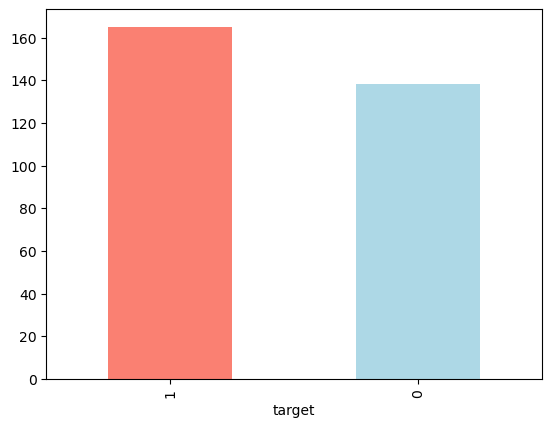

In [4]:
df['target'].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df[df['age'] == 29]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


### Heart Disease frequency according to Gender.

In [9]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
# Compare target column with gender column
pd.crosstab(index=df['target'], columns=df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


***Based solely on our `data set` we can infer that about `75%` of women have heart disease***
***On the flip side for men the probability of having heart disease is roughly `50%`***

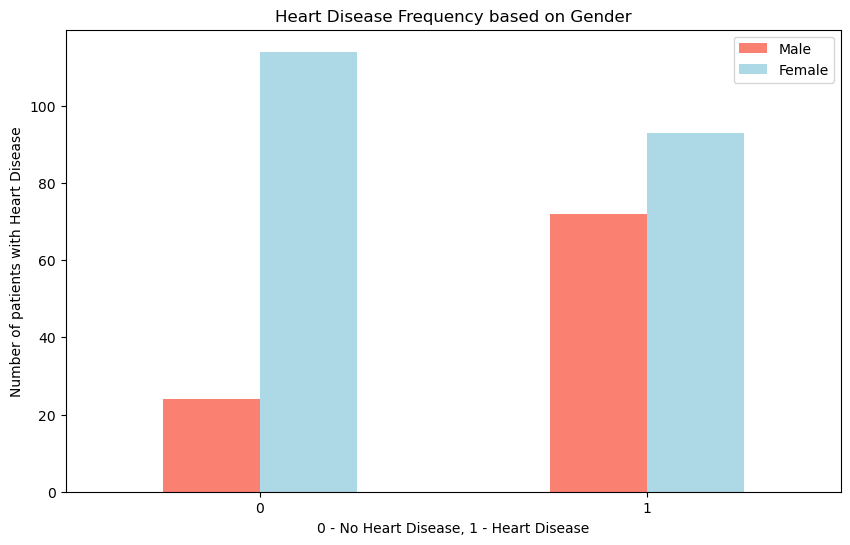

In [11]:
pd.crosstab(index=df['target'], columns=df['sex']).plot(kind="bar", 
                                                        figsize=(10, 6), 
                                                        color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency based on Gender")
plt.xlabel("0 - No Heart Disease, 1 - Heart Disease")
plt.ylabel("Number of patients with Heart Disease")
plt.legend(['Male', 'Female'])
plt.xticks(rotation=0);

***Age vs Max Heart Rate for Heart Disease***

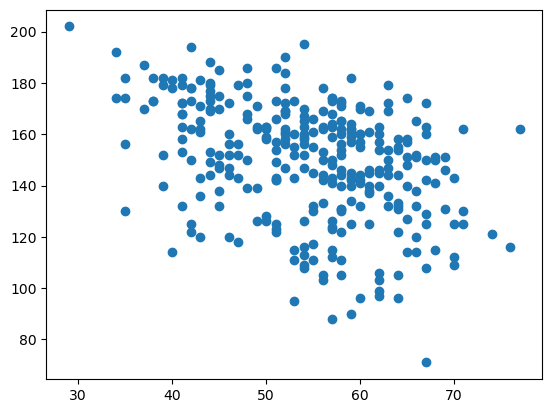

In [12]:
# pd.crosstab(index=df['age'], columns=['thalach']).plot(kind="scatter", figsize=(10, 6))
# plt.plot(x=df['age'], y=df['age'], kind="scatter", figsize=(10, 6))
plt.scatter(x=df['age'], y=df['thalach'])

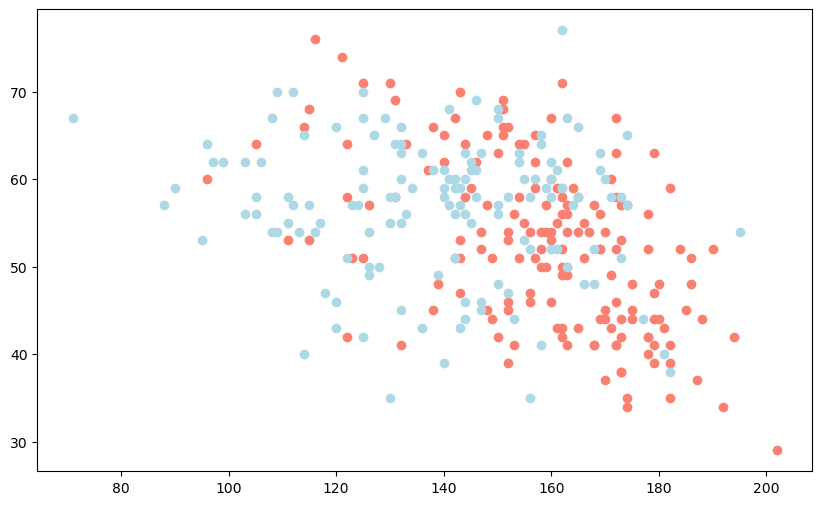

In [17]:
# Create another figure
plt.figure(figsize=(10, 6))

# figure with positive examples
plt.scatter(x=df.thalach[df.target == 1], y=df.age[df.target == 1], c="salmon")
# figure with negative examples
plt.scatter(x=df.thalach[df.target==0], y=df.age[df.target==0], c="lightblue")

In [57]:
len(df[df["thalach"] & df["target"] == 1])
# y=df[df["target"] == 1 & df["age"]]
df.

75

In [61]:
pd.crosstab(index=df['target'], columns=df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


<Axes: ylabel='Frequency'>

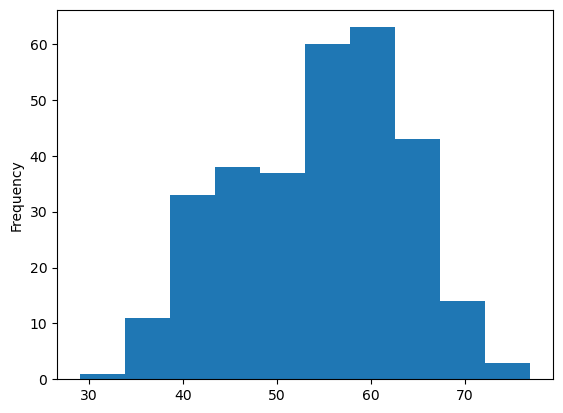

In [20]:
# Check the distribution of the age column with a histogram
# a Normal Distribution
df.age.plot.hist()

### Heart Disease Frequecy to Chestpain type:
***cp - Chest pain type:***
* 0 - typical angina {`Decreased Blood Supply to the Heart`}
* 1 - atypical angina {`Not related to the Heart`}
* 2 - non-anginal {`Esophageal spasms`}
* 3 - asymptomatic {`Chest pains not showing signs of disease`}

In [23]:
# We get to see that Esophageal spasms which are actually not 
# heart related have a correlation with heart disease
# While decreased blood supply in a patient doesn't have a strong corelation to heart disease
pd.crosstab(index=df.cp, columns=df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

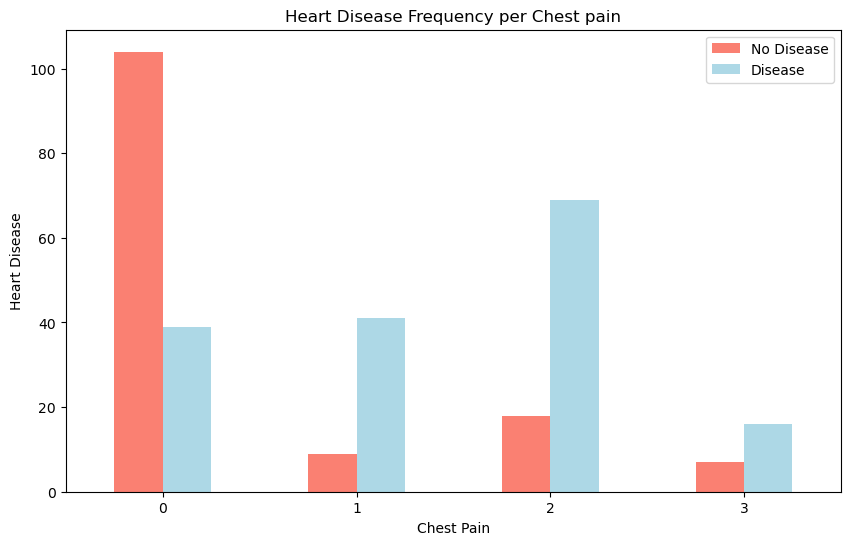

In [29]:
# Make the cross tab more visual
pd.crosstab(index=df.cp,  columns=df.target).plot(kind='bar', 
                                                  figsize=(10, 6), 
                                                  color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per Chest pain")
plt.xlabel("Chest Pain")
plt.ylabel("Heart Disease")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
# Make a Corelation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


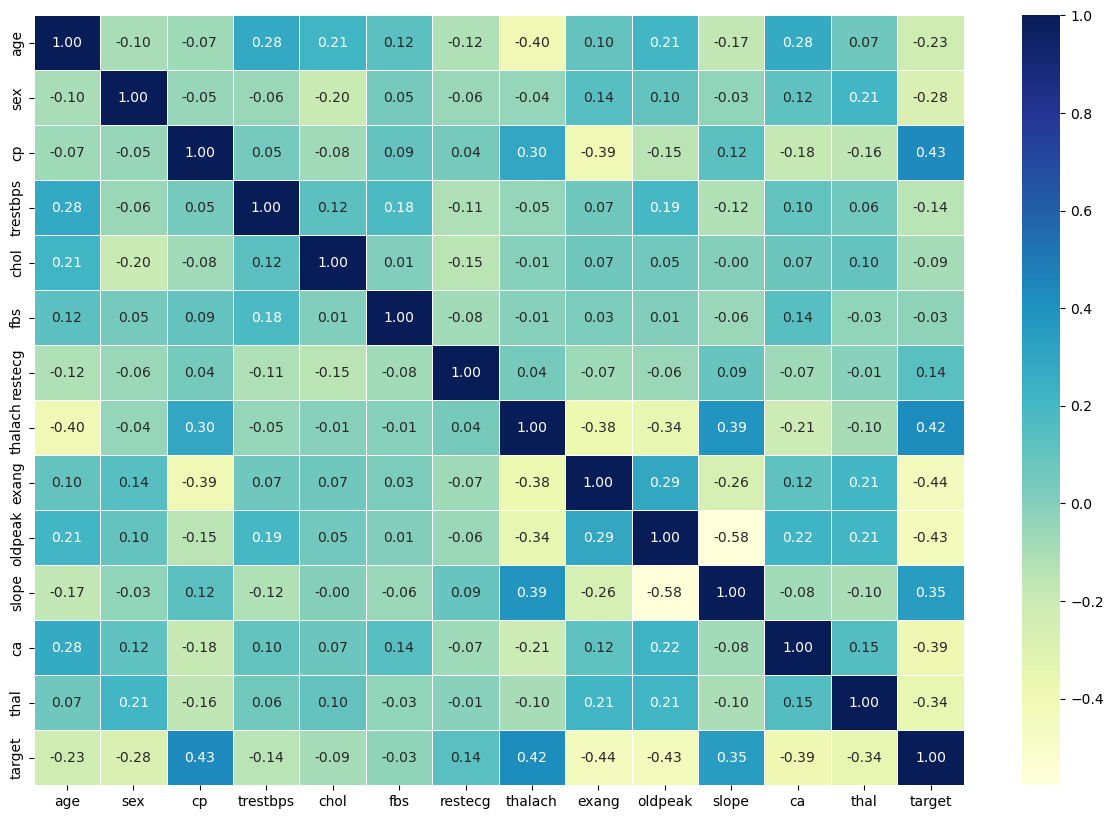

In [32]:
# Let's Make our Correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f", 
                 cmap="YlGnBu")

### 5. Modeling

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
# Split our data into X and Y
x = df.drop("target", axis=1)
y = df["target"]

In [39]:
# Split our data into train & test 
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2)

In [42]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [43]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

#### **Since our data has been split tinto training and test sets, it's time to build our ML model**
***We'll train it on train set and test it on test set but before then we need to find a model to use.***

Models we will be using: 
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Regression

In [44]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN Classifier": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given Machine Learning models.
    models: a dict of Scikit-Learn machine learning models
    x_train: Training Data (no labels)
    x_test: Testing Data (no labels)
    y_train: Labels for training data
    y_test: Labels fot testing data
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append it's score to model scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [45]:
model_scores = fit_and_score(models=models, 
                             x_train=x_train, 
                             x_test=x_test, 
                             y_train=y_train, 
                             y_test=y_test)
model_scores

C:\Users\User\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN Classifier': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model comparison

In [48]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,Logistic Regression,KNN Classifier,Random Forest
accuracy,0.885246,0.688525,0.836066


<Axes: >

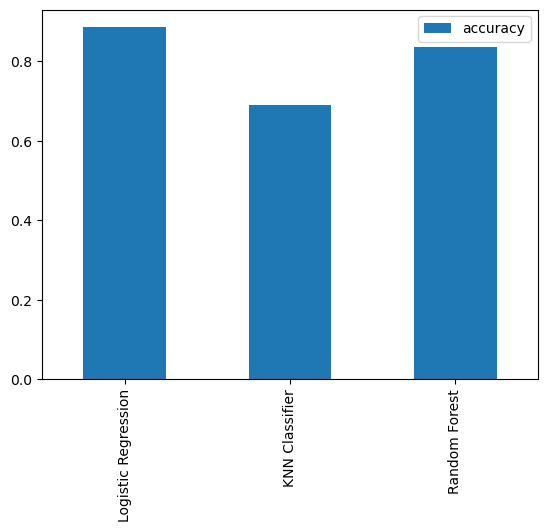

In [50]:
model_compare.transpose().plot.bar()

Now we've found our models predictions and we know our first predictions aren't what we should base our next steps of... what should we do?

**Classification ... and ... Regression metrics**
1. Accuracy`          `R(squared)
2. Precision`          `Mean Absolute Error
3. Recall`            `Mean Squared Error
4. F1`               `Root Mean Squared Error

**Confusion Matrix**

**Classification Report**

**We will be covering the following**
1. Hyperparameter tuning
2. Feature Importance
3. Confusion Matrix
4. Cross Validation
5. Precision
6. Recall
7. F1 score
8. Classification Report
9. ROC Curve
10. Area Under Curve(AUC)

#### Hyperparameter Tuning

In [52]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through the different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(x_train, y_train)
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [53]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [54]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data is: 75.41%


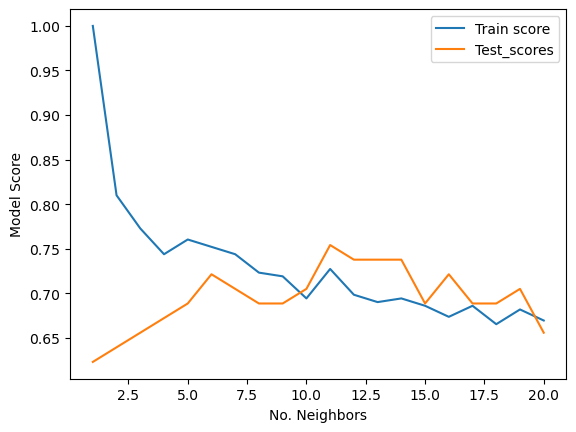

In [56]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test_scores")
plt.xlabel("No. Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data is: {max(test_scores) * 100:.2f}%")

`KNN still performs below expectations so we are going to be...`
#### Tuning Hyper Parameters using `Randomized SearchCV`

We're going to be tuning 
* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [65]:
# Create a hyperparameter Grid for LogisticsRegression()
log_reg_grid = {
    "C": np.logspace(-4, 4, 20), 
    "solver": ["liblinear"]
}
# Create hyperparameter tuning for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50), 
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

Now that we have hyper parameter grids setup for each of our models that can be tuned using RandomizedSearchCV

In [60]:
# Tuning Logistics Regression
np.random.seed(42)

# Setup random Hyperparameter search for logistics regression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [61]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [62]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

We got the same value `88.5%` now let's tune the RandomForestClassifier()

In [66]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid, 
                           cv=5, 
                           n_iter=100, 
                           verbose=True)
# Fit random Hyperparameter search model for RandomForestClasifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [70]:
# Find best hyperparameters
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_depth': None}

In [72]:
# Evaluate the RandomizedForrestClassifier()
rs_rf.score(x_test, y_test)

0.8688524590163934

In [73]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN Classifier': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

##### Omo it seems as though the best result we can get with this won't be more than 86.9%

### Hyperparameter tuning Using GridSearchCV()
**Since LogisticRegression() provided the best scores so far we're going to tune it using GridSearchCV**

In [76]:
# Different hyperparameters for LogisticRegression()
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

# Setup Grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid=log_reg_grid, 
                          cv=5, 
                          verbose=True)
# Fit our grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [80]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [81]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

#### Evaluating our tuned model beyond accuracy
* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

... and it would be great if cross validation was used where possible.
to make comparison and evaluate our model first we need to make predictions

In [82]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [83]:
y_test, y_preds

(179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64,
 array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64))

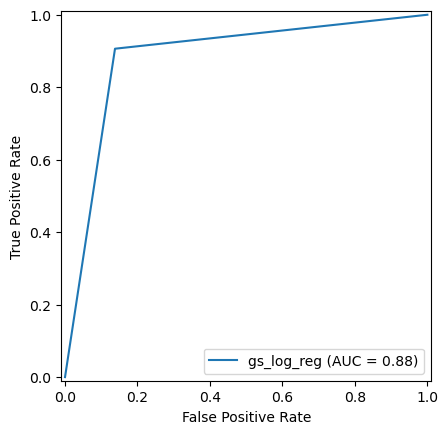

In [96]:
# Plot ROC curve and calculate the AUC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='gs_log_reg')
display.plot()
plt.show()

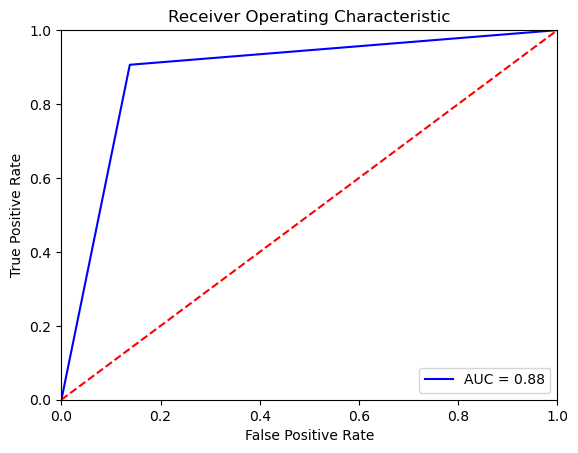

In [95]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


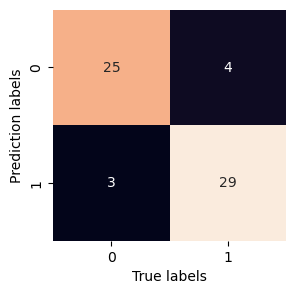

In [99]:
# Plot confusion matrix
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True labels")
    plt.ylabel("Prediction labels")

plot_conf_mat(y_test, y_preds)

Now that we have ROC curve AUC metric and confusion matrix we can begin the Classification report as well as cross validated recall, precision and f1-score.

In [100]:
# Classification report for Normal train test split data
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



* `Precision` indicates the proportion of positive identifications a model that predicts no false positives has a precision of 1.0

* `Recall` indicates the proportion of actual positives that were cholerically classified a model that predicts no false negatives has a recall of 1.0

* `F1-score` is a combination of precision and recall

* `Support` is the number of samples each metric was calculated on

* `Macro Average` is the average precision recall and f1-score between classes/support/labels[0 & 1] in this case it doesn't take class imbalance into account. (if our data set had 29 entries with 0 and 42 entries with 1 that would be considered class  imbalance)

* `Weighted Average` is calculated with respect to how many samples there are in each class (if there is class imbalance this metric would favor the majority class)

#### Calculate evaluation metrics using cross-validation
 we're going to calculate precision recall and f1-score of our model using cross validation and to do so we will be using the `cross_val_score()`.

In [101]:
# Checking the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [102]:
# Create a new classifier with the best parameters
clf = LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')

In [108]:
# Cross validated `Accuracy`
cv_acc = cross_val_score(clf, 
                         x, 
                         y, 
                         cv=5, 
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [112]:
cv_acc = np.mean(cv_acc)

In [110]:
# Cross validated precision score
cv_prec = cross_val_score(clf, x, y, cv=5, scoring='precision')
cv_prec

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [113]:
cv_prec = np.mean(cv_prec)

In [114]:
# Cross validated recall score
cv_rec = cross_val_score(clf, x, y, cv=5, scoring='recall')
cv_rec

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [115]:
cv_rec = np.mean(cv_rec)

In [117]:
# Cross validated f1-score
cv_f1 = cross_val_score(clf, 
                         x, 
                         y, 
                         cv=5, 
                         scoring='f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

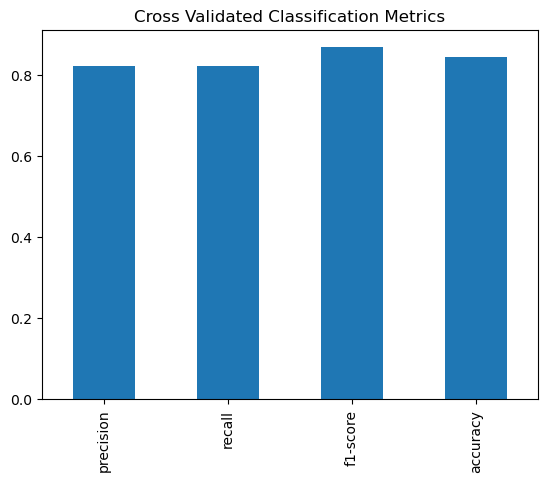

In [122]:
# Visualize our cross validated metrics
cv_metrics = pd.DataFrame({'precision':cv_prec, 'recall': cv_prec, 'f1-score': cv_f1, 'accuracy': cv_acc}, index=[0])

cv_metrics.transpose().plot.bar( title="Cross Validated Classification Metrics", legend=False);

#### Feature Importance
* This is a way of determining which of the features contributed most to the experimentation
and how they contributed.
* Finding Feature importance is different for each machine learning model and one way to find out how to get feature importance for the model you are using is to Google `[Model Name] feature importance`
* Below we will be finding the feature importance for our `LogisticRegressionModel()`

In [123]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
# Fit an instance of logistic regression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [126]:
# We will now be checking the coef of our log reg model
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [127]:
# Match the coef of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [131]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


<Axes: title={'center': 'Feature Importance'}>

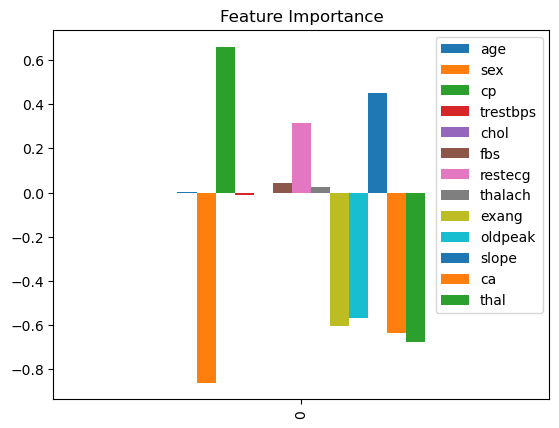

In [148]:
# Visualize Feature importance
feature_df.plot(kind='bar', title="Feature Importance")

In [146]:
feature_df.T

,0
age,0.003167
sex,-0.860447
cp,0.660670
trestbps,-0.011570
chol,-0.001664
fbs,0.043861
restecg,0.312758
thalach,0.024594
exang,-0.604131
oldpeak,-0.568628


<Axes: title={'center': 'Feature Importance'}>

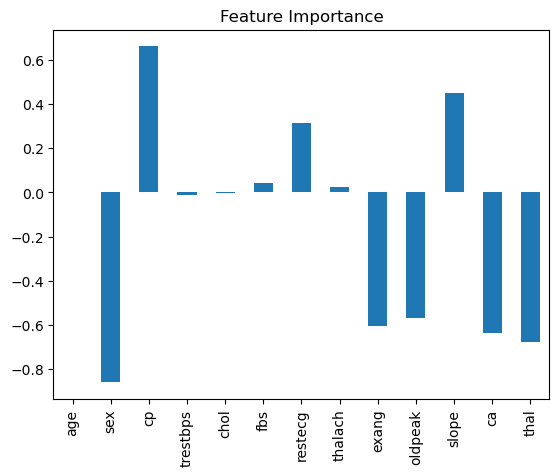

In [144]:
feature_df.T.plot.bar(title="Feature Importance", legend=False)

***From the table above we get to see that features like `age` `trestbps` and `chol` play a very small part in determining whether a patient has heart disease***

So with this info inorder get closer to achieving `95%` model accuracy using LogisticRegression() we could lay off the irrelevant columns and focus on improving the quality and quantity of columns that played a major role in determining patients heart disease status.
e.g `sex` `cp` `thalac` `exang`

In [153]:
# Saving our model.
import pickle
with open('Heart_Disease_Model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [150]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93
